<h1><center>CSE391, Quiz 4_pop, Spring 2108 </center></h1>



# Read the data upload into Documents on Blackboard labeled as SampleData_IMC.csv. The column 4 to 12 contain the features and column 3 contains labels. The first two columns can be discarded. Use an SVM classifier to classify this data and report the accuracy of the classifier?

# what are the other evalution metrics like TPR, FDR, sensitivity?




In [10]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
import pandas as pd


csv = pd.DataFrame.from_csv('SampleData_IMC.csv')
csv.head()

Automatically created module for IPython interactive environment


,AON,Churn Flag,Avg_Inactive_Days in last 1 month,Current_Balance in INR,Data Days Latest week,Calling Days Latestweek,Recharge Amount Latest Week,Avg_OG_Local_Offnet_Cnt,Avg_OG_Local_Offnet_Cnt.1,Roaming User,Avergae Complaints Count Last 4 weeks
MSISDN,,,,,,,,,,,
7610120456,6-12 months,1,4.18,20,1,1,44,13,5,0,3
7611120467,12-18 months,0,16.00,18,2,3,18,7,14,1,1
9711120467,>18 months,0,18.00,8,4,2,98,12,12,0,0
9830022336,3-6 months,0,18.00,8,3,2,86,3,12,0,2
9713246555,>18 months,0,6.00,44,6,3,36,11,4,0,2


In [42]:
train, test = train_test_split(csv, random_state=0)

y_train = train.iloc[:,1]
X_train= train.iloc[:,2:]

y_test = test.iloc[:,1]
X_test= test.iloc[:,2:]

In [50]:

classifier = svm.SVC(kernel='linear', C=0.01)
y_pred = classifier.fit(X_train, y_train).predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

Confusion matrix, without normalization
[[45  0]
 [ 4  0]]
Normalized confusion matrix
[[ 1.  0.]
 [ 1.  0.]]


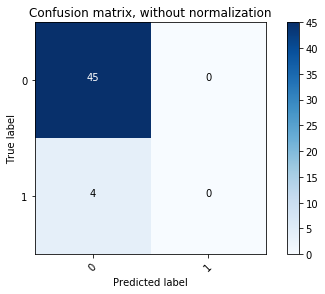

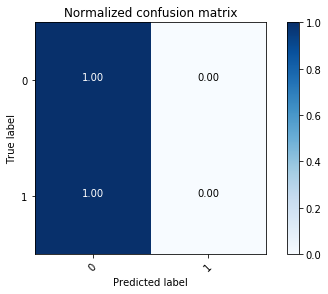

In [44]:
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [53]:
from pandas_ml import ConfusionMatrix
cm = ConfusionMatrix(y_test, y_pred)
cm.print_stats()

C:\Anaconda3\lib\site-packages\pandas_ml\confusion_matrix\stats.py:51: RuntimeWarning: invalid value encountered in double_scalars
  p0 = np.float64(np.diag(df.iloc[0:m, 0:m]).sum()) / n
C:\Anaconda3\lib\site-packages\pandas_ml\confusion_matrix\stats.py:52: RuntimeWarning: invalid value encountered in double_scalars
  pc = np.float64((ni.iloc[0:m] * nj.iloc[0:m]).sum()) / (n**2)


ZeroDivisionError: float division by zero